## This is a project where we are going to study the history of Scala project using data provided in the Git and Github websites.



First of all we have to read the data. All data fetch from Scala website is stored as csv files in the dataset folder in the folder of this notebook. 
csv files are as follows:
1.   pulls_2011-2013.csv contains the basic information about the pull requests, and spans from the end of 2011 up to (but not including) 2014.
2. pulls_2014-2018.csv contains identical information, and spans from 2014 up to 2018.
3. pull_files.csv contains the files that were modified by each pull request.



In [1]:
#importing
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
os.chdir('/content/drive/My Drive/Colab Notebooks/datacamp projects/history of scala/datasets')

In [2]:
# load all files as dataframes
pull_one=pd.read_csv("pulls_2011_2013.csv")
pull_two=pd.read_csv("pulls_2014-2018.csv")
pull_files=pd.read_csv("pull_files.csv")

In [3]:
#checking all the imported data
pull_files.head()

,pid,file
0,163314316,test/files/pos/t5638/Among.java
1,163314316,test/files/pos/t5638/Usage.scala
2,163314316,test/files/pos/t9291.scala
3,163314316,test/files/run/t8348.check
4,163314316,test/files/run/t8348/TableColumn.java


In [4]:
# appending data of pulls from 2011 to 2018 as one file
pull=pd.concat([pull_one,pull_two], ignore_index=True)
pull.shape
#pull.shape

(6200, 3)

In [5]:
#convert the data time as string in the dataset to datatime object
pull["date"]=pd.to_datetime(pull["date"], utc=True)
pull.head()

,pid,user,date
0,11166973,VladimirNik,2013-12-31 23:10:55+00:00
1,11161892,Ichoran,2013-12-31 16:55:47+00:00
2,11153894,Ichoran,2013-12-31 02:41:13+00:00
3,11151917,rklaehn,2013-12-30 23:45:47+00:00
4,11131244,qerub,2013-12-29 17:21:01+00:00


In [6]:
#merge both datasets so that we have one dataset. It would be easier to work on it.
data=pull.merge(pull_files, on="pid")
data.head()

,pid,user,date,file
0,11166973,VladimirNik,2013-12-31 23:10:55+00:00,src/reflect/scala/reflect/api/Printers.scala
1,11166973,VladimirNik,2013-12-31 23:10:55+00:00,src/reflect/scala/reflect/internal/Printers.scala
2,11166973,VladimirNik,2013-12-31 23:10:55+00:00,test/files/run/reify_ann3.check
3,11166973,VladimirNik,2013-12-31 23:10:55+00:00,test/junit/scala/reflect/internal/PrintersTest...
4,11161892,Ichoran,2013-12-31 16:55:47+00:00,src/library/scala/collection/mutable/ArrayOps....


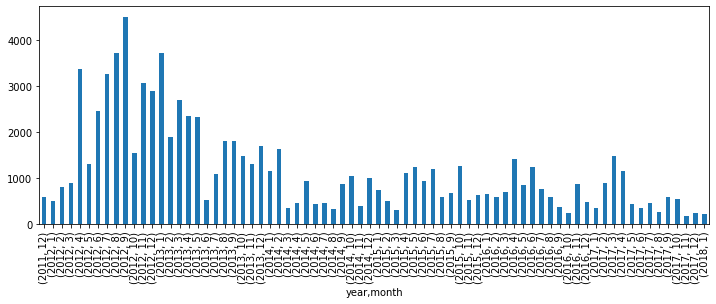

In [7]:
#check number of pull happening by month and year
data["month"]=data["date"].dt.month
data["year"]=data["date"].dt.year
counts=data.groupby(["year","month"])["pid"].count()
#data.head()
#type(counts)
#counts
counts.plot(kind='bar', figsize = (12,4))

## We can observe from the graph above that in 2012 there were more pull requests (Updates) as compared to subsequent years. This also can be contributed to the fact that Scala was stable in later years.
Now lets check how many users submitted pull request. We want to see that is there are more users or a few users are submitting the requests.

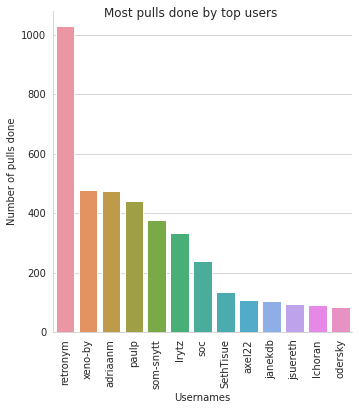

In [14]:
#sns.countplot(x="user", data=data)
#type(data)
sns.set_style("whitegrid")
user_count=pull.groupby("user")["pid"].count().reset_index(name='count')
user_count= user_count.sort_values(by='count', ascending=False)
user_count['c_sum']=user_count['count'].cumsum()
#user_count_4k
g=sns.catplot(x="user", y='count', data=user_count[user_count['c_sum']<=4000], kind='bar')
g.fig.suptitle("Most pulls done by top users")
g.set(xlabel='Usernames', ylabel='Number of pulls done')
plt.xticks(rotation=90)
plt.show()

## This can be seen from the graph above that most of the pulls are done by few users.

In [21]:
#lets see who did the last 10 pulls, we can do that by using nlargest function
last_10 = pull.nlargest(10, 'date')
last_10

,pid,user,date
3301,162765232,howtonotwin,2018-01-13 04:37:17+00:00


In [17]:
# now lets see which were the files which were updated by last 10 pulls. One pull can update multiple files.

joined_pr = pull_files.merge(last_10, on="pid")
files=set(joined_pr['file'])
files

{'LICENSE',
 'doc/LICENSE.md',
 'doc/License.rtf',
 'project/VersionUtil.scala',
 'src/compiler/scala/reflect/reify/phases/Calculate.scala',
 'src/compiler/scala/tools/nsc/backend/jvm/BCodeHelpers.scala',
 'src/compiler/scala/tools/nsc/backend/jvm/PostProcessor.scala',
 'src/compiler/scala/tools/nsc/backend/jvm/analysis/BackendUtils.scala',
 'src/compiler/scala/tools/nsc/profile/AsyncHelper.scala',
 'src/compiler/scala/tools/nsc/profile/Profiler.scala',
 'src/compiler/scala/tools/nsc/symtab/classfile/ClassfileParser.scala',
 'src/compiler/scala/tools/nsc/typechecker/Contexts.scala',
 'src/library/scala/Predef.scala',
 'src/library/scala/concurrent/Lock.scala',
 'src/library/scala/util/Properties.scala',
 'src/reflect/scala/reflect/internal/pickling/ByteCodecs.scala',
 'src/reflect/scala/reflect/internal/tpe/GlbLubs.scala',
 'src/scaladoc/scala/tools/nsc/doc/html/page/Entity.scala',
 'src/scalap/decoder.properties',
 'test/files/neg/leibniz-liskov.check',
 'test/files/neg/leibniz-liskov

In [27]:
# This is the file we are interested in:
file = 'src/compiler/scala/reflect/reify/phases/Calculate.scala'

# Identify the commits that changed the file
file_pr = data[data['file']==file]
file_pr
# Count the number of changes made by each developer
author_counts = file_pr.groupby('user')['pid'].count().reset_index(name='count')
author_counts.nlargest(3,'count')

,user,count
9,xeno-by,11
6,retronym,5
7,soc,4


In [28]:
pull_files.head()

,pid,file
0,163314316,test/files/pos/t5638/Among.java
1,163314316,test/files/pos/t5638/Usage.scala
2,163314316,test/files/pos/t9291.scala
3,163314316,test/files/run/t8348.check
4,163314316,test/files/run/t8348/TableColumn.java


In [48]:
file = 'src/compiler/scala/reflect/reify/phases/Calculate.scala'

# Select the pull requests that changed the target file
file_pr = pull_files[pull_files['file']==file]

# Merge the obtained results with the pulls DataFrame
joined_pr = pull.merge(file_pr,on='pid')
#type(joined_pr)
# Find the users of the last 10 most recent pull requests
joined_pr = joined_pr.nlargest(10,'date')
users_last_10=joined_pr['user'].drop_duplicates()

# Printing the results
set(users_last_10)

{'bjornregnell', 'retronym', 'soc', 'starblood', 'xeno-by', 'zuvizudar'}

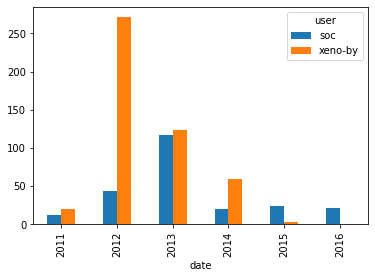

In [ ]:
# The developers we are interested in
authors = ['xeno-by', 'soc']

# Get all the developers' pull requests
by_author = pull[pull['user'].isin(authors)]
#by_author
# Count the number of pull requests submitted each year
counts = by_author.groupby([by_author['user'], by_author['date'].dt.year]).agg({'pid': 'count'}).reset_index()
#counts
# Convert the table to a wide format
counts_wide = counts.pivot_table(index='date', columns='user', values='pid', fill_value=0)

# Plot the results
# ... YOUR CODE FOR TASK 9 ...
counts_wide.plot(kind='bar')

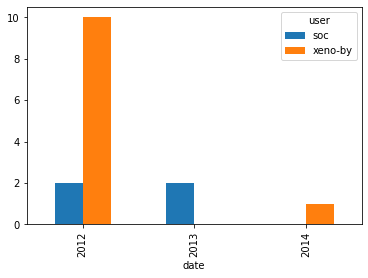

In [ ]:
authors = ['xeno-by', 'soc']
file = 'src/compiler/scala/reflect/reify/phases/Calculate.scala'

# Select the pull requests submitted by the authors, from the `data` DataFrame
by_author = data[data['user'].isin(authors)]

# Select the pull requests that affect the file
by_file = by_author[by_author['file']==file]

# Group and count the number of PRs done by each user each year
grouped = by_file.groupby(['user', by_file['date'].dt.year]).count()['pid'].reset_index()

# Transform the data into a wide format
by_file_wide = grouped.pivot_table(index='date', columns='user', values='pid', fill_value=0)

# Plot the results
by_file_wide.plot(kind='bar')